# **Classification Model - CDK Extended**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('acetylcholinesterase_dataset_CDKextended.csv')

In [ ]:
import numpy as np
df = df[np.isfinite(df).all(1)]
df = df.reset_index(drop=True)

In [ ]:
df.head()

,ExtFP1,ExtFP2,ExtFP3,ExtFP4,ExtFP5,ExtFP6,ExtFP7,ExtFP8,ExtFP9,ExtFP10,...,ExtFP1016,ExtFP1017,ExtFP1018,ExtFP1019,ExtFP1020,ExtFP1021,ExtFP1022,ExtFP1023,ExtFP1024,pIC50
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,0,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910


In [ ]:
bioactivity_threshold = []
for i in df.pIC50:
  if float(i) <= 5.0:
    bioactivity_threshold.append("Inactive") #inactive
  elif float(i) >= 6.0:
    bioactivity_threshold.append("Active") #active
  else:
    bioactivity_threshold.append("Intermediate") #intermediate

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='Bio_class')
df = pd.concat([df, bioactivity_class], axis=1)
df

,ExtFP1,ExtFP2,ExtFP3,ExtFP4,ExtFP5,ExtFP6,ExtFP7,ExtFP8,ExtFP9,ExtFP10,...,ExtFP1017,ExtFP1018,ExtFP1019,ExtFP1020,ExtFP1021,ExtFP1022,ExtFP1023,ExtFP1024,pIC50,Bio_class
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6.124939,Active
1,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,7.000000,Active
2,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.301030,Inactive
3,0,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6.522879,Active
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6.096910,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,8.590067,Active
5820,1,0,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,8.621602,Active
5821,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,9.387216,Active
5822,1,0,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,9.200659,Active


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


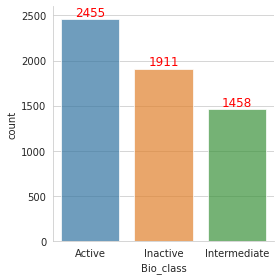

In [ ]:
import math
# Set plotting style
sns.set_style('whitegrid')

# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 
sns.factorplot('Bio_class', data=df, kind='count', alpha=0.7, size=4, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = df['Bio_class'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')


In [ ]:
X = df.drop(['pIC50','Bio_class'], axis=1)
X

,ExtFP1,ExtFP2,ExtFP3,ExtFP4,ExtFP5,ExtFP6,ExtFP7,ExtFP8,ExtFP9,ExtFP10,...,ExtFP1015,ExtFP1016,ExtFP1017,ExtFP1018,ExtFP1019,ExtFP1020,ExtFP1021,ExtFP1022,ExtFP1023,ExtFP1024
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1,0,1,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
5820,1,0,1,1,0,0,0,0,0,1,...,1,1,1,0,0,0,0,0,0,0
5821,1,0,1,1,0,0,0,0,1,0,...,1,1,1,0,0,0,0,0,0,0
5822,1,0,1,1,0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [ ]:
Y = df.Bio_class
Y

0         Active
1         Active
2       Inactive
3         Active
4         Active
          ...   
5819      Active
5820      Active
5821      Active
5822      Active
5823      Active
Name: Bio_class, Length: 5824, dtype: object

In [ ]:
X.shape

(5824, 1024)

In [ ]:
Y.shape

(5824,)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,ExtFP1,ExtFP2,ExtFP3,ExtFP4,ExtFP5,ExtFP6,ExtFP7,ExtFP9,ExtFP10,ExtFP11,...,ExtFP994,ExtFP995,ExtFP997,ExtFP998,ExtFP999,ExtFP1012,ExtFP1013,ExtFP1015,ExtFP1016,ExtFP1017
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,1,0,0,0,0
1,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1,0,1,1,0,0,0,0,0,1,...,1,0,0,1,1,1,1,1,1,1
5820,1,0,1,1,0,0,0,0,1,1,...,1,0,0,1,1,1,1,1,1,1
5821,1,0,1,1,0,0,0,1,0,1,...,1,0,0,1,1,1,1,1,1,1
5822,1,0,1,1,0,1,0,0,0,1,...,1,0,0,1,1,1,1,1,1,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
Ly = LabelEncoder()
Ly.fit_transform(Y)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
Ly.classes_

array(['Active', 'Inactive', 'Intermediate'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, Y_train.shape

((4659, 927), (4659,))

In [ ]:
X_test.shape, Y_test.shape

((1165, 927), (1165,))

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.1
!pip install PyYAML==5.3.1

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 13.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 269 kB 22.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=cf7d75fc56d7c89ba909aadb4d153148f686012fea0c2ac5c697959bc83d2666
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)

100%|██████████| 29/29 [01:16<00:00,  2.63s/it]


In [ ]:
# Performance table of the training set (80% subset)
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.99,0.99,None,0.99,25.23
LinearDiscriminantAnalysis,0.99,0.99,None,0.99,0.97
RandomForestClassifier,0.99,0.99,None,0.99,1.23
LogisticRegression,0.99,0.99,None,0.99,0.86
LinearSVC,0.99,0.99,None,0.99,4.60
ExtraTreesClassifier,0.99,0.99,None,0.99,0.84
LabelPropagation,0.99,0.99,None,0.99,0.32
LabelSpreading,0.99,0.99,None,0.99,0.37
DecisionTreeClassifier,0.99,0.99,None,0.99,0.46


In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [01:14<00:00,  2.58s/it]


In [ ]:
# Performance table of the test set (20% subset)
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.65,0.62,None,0.64,0.98
NuSVC,0.63,0.61,None,0.63,1.07
XGBClassifier,0.64,0.61,None,0.63,10.32
ExtraTreesClassifier,0.63,0.60,None,0.62,0.78
RandomForestClassifier,0.62,0.59,None,0.61,1.22
LGBMClassifier,0.61,0.59,None,0.61,26.39
PassiveAggressiveClassifier,0.58,0.57,None,0.58,0.60
Perceptron,0.58,0.56,None,0.58,0.27
SGDClassifier,0.57,0.56,None,0.57,0.39
